In [82]:
import sys,os,os.path
os.environ['PATH']=os.environ['PATH']+':/local-homes/mammann/texlive/bin/x86_64-linux/'

In [83]:
%load_ext autoreload
%autoreload 2
from tlspuffin_analyzer import *
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
plt.rcParams.update({
    "font.family": "serif",
    "font.size": "8",
    "text.usetex": True,
    "pgf.rcfonts": False,
    "pgf.texsystem": "pdflatex",
    "lines.linewidth": 0.5,
#    'figure.dpi': 300,
    "pgf.preamble": [
         r"\usepackage[utf8x]{inputenc}",
         r"\usepackage[T1]{fontenc}",
         r"\usepackage{cmbright}",
         ]
})

/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [85]:
pesto_path = "/local-homes/mammann/tlspuffin/experiments"

from IPython.display import display, Markdown

def display_readme(path):
    with open (path, "r") as file:
        display(Markdown(file.read()))
        
def load(path, experiment, specific=1, use_fixed=False):
    if use_fixed:
        stats = load_json_slurpy("%s/%s/stats-fixed.json" % (path, experiment), specific)
    else:
        stats = load_json_slurpy("%s/%s/stats.json" % (path, experiment), specific)
    start_date = get_start_date(stats)

    display_readme("%s/%s/README.md" % (path, experiment))
    return stats, start_date

#def plot_stats(path, experiment, specific=1):
#    stats, start_date = load(path, experiment, specific)
#    fig = plot_client_stats(start_date, stats)
#
#    fig.set_size_inches(12, 14, forward=True)
#    fig.tight_layout(pad=1)
#    plt.show()

width = 2.9
height = 1.2

def setup_yaxis(ax, interval):
    loc = ticker.MultipleLocator(base=interval) # this locator puts ticks at regular intervals
    ax.yaxis.set_major_locator(loc)

In [86]:
def thesis_plot_corpus_size(path, experiment):
    stats, start_date = load(path, experiment, 3)
    times, data = spread_xy(start_date, stats)
    
    fig, ax = plt.subplots()
    
    fig.set_size_inches(width, height)
    
    plot_single(ax, times, data, lambda stats: stats["corpus_size"], "Corpus Size")
    plt.savefig(experiment + "_corpus-size.pdf", bbox_inches="tight")

In [87]:
def thesis_plot_coverage(path, experiment, use_fixed=False):
    stats, start_date = load(path, experiment, specific=3, use_fixed= use_fixed)
    times, data = spread_xy(start_date, stats)
    
    print("Max edges: " + str(data[0]["coverage"]["max"]))
    
    fig, ax = plt.subplots()
    setup_yaxis(ax, 100)
    
    fig.set_size_inches(width, height)
    #ax.set_ylim([4500,6100])
    plot_single(ax, times, data, lambda stats: stats["coverage"]["discovered"], "Coverage")
    #plt.yscale('log')
    plt.savefig(experiment + "_coverage.pdf", bbox_inches="tight")

In [88]:
def thesis_plot_execs_per_s(path, experiment, specific=3,use_fixed=False):
    stats, start_date = load(path, experiment, specific, use_fixed)
    times, data = spread_xy(start_date, stats)
    
    fig, ax = plt.subplots()
    
    setup_yaxis(ax, 100)
    fig.set_size_inches(width, height)
    
    plot_single(ax, times, data, lambda stats: stats["exec_per_sec"], "Execs/s", smooth=True)
    plt.savefig(experiment + "_execs_per_s.pdf", bbox_inches="tight")

In [89]:
def thesis_plot_objectives(path, experiment, specific=3, use_fixed=False, trunc_minutes=None):
    stats, start_date = load(path, experiment, specific, use_fixed)
    times, data = spread_xy(start_date, stats, trunc_minutes=trunc_minutes)
    
    fig, ax = plt.subplots()
    
    fig.set_size_inches(width, height)
    
    plot_with_other(ax, times, data, 
                     lambda stats: stats["objective_size"], "Objective Corpus",
                     lambda stats: stats["corpus_size"], "Seed Corpus"
    )
    plt.savefig(experiment + "_objectives.pdf", bbox_inches="tight")

In [90]:
def thesis_plot_perf(path, experiment):
    stats, start_date = load(path, experiment, 3)
    times, data = spread_xy(start_date, stats)
    
    fig, ax = plt.subplots()
    
    fig.set_size_inches(width, height)
    
    plot_single(ax, times, data, 
                lambda stats: stats["intro"]["introspect_features"]["mutate"], "Mutations", color="#ca0020"
    )
    plot_single(ax, times, data, 
                lambda stats: stats["intro"]["introspect_features"]["target_execution"], "LUT", color="#0571b0"
    )
    ax.set_ylabel("Perf Share", color="black")
    ax.legend(loc='center right')
    plt.savefig(experiment + "_perf.pdf", bbox_inches="tight")

In [91]:
def thesis_plot_trace(path, experiment):
    stats, start_date = load(path, experiment, 3)
    times, data = spread_xy(start_date, stats)
    
    fig, ax = plt.subplots()
    
    fig.set_size_inches(width, height)
    
    plot_single(ax, times, data, lambda stats: stats["trace"]["mean_trace_length"], "Mean Trace Length", smooth=True)
    plt.savefig(experiment + "trace-size.pdf", bbox_inches="tight")

In [92]:
def thesis_plot_term(path, experiment):
    stats, start_date = load(path, experiment, 3)
    times, data = spread_xy(start_date, stats)
    
    fig, ax = plt.subplots()
    
    fig.set_size_inches(width, height)
    
    plot_single(ax, times, data, lambda stats: stats["trace"]["mean_term_size"], "Mean Recipe Size", smooth=True)
    plt.savefig(experiment + "term-size.pdf", bbox_inches="tight")

In [93]:
def thesis_plot_trace_term(path, experiment):
    stats, start_date = load(path, experiment, 3)
    times, data = spread_xy(start_date, stats)
    
    fig, ax = plt.subplots()
    
    fig.set_size_inches(width, height)
    
    plot_single(ax, times, data, 
                lambda stats: stats["trace"]["mean_term_size"], "Mean Term Size", color="#ca0020", smooth=True
    )
    ax = ax.twinx()
    plot_single(ax, times, data, 
                lambda stats: stats["trace"]["mean_trace_length"], "Mean Trace Length", color="#0571b0", smooth=True
    )
    
    plt.savefig(experiment + "trace-term-size.pdf", bbox_inches="tight")

## OpenSSL 111k

# Experiment: thesis-openssl
* OpenSSL: OpenSSL 1.1.1k  25 Mar 2021
* Date: 2021-08-31T14:05:20.148677249+02:00
* Git Ref: b95f0feec66bd267199e805574876b1084a59b39
* Git Commit: Switch from core number to core definition
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Run for thesis


Max value in plotted data: 481


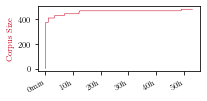

In [94]:
# OpenSSL 111k: Normal execution, Corpus Size
thesis_plot_corpus_size(pesto_path, "2021-08-31-140520-thesis-openssl-0")

# Experiment: thesis-openssl111-again
* OpenSSL: OpenSSL 1.1.1k  25 Mar 2021
* Date: 2021-10-01T13:29:52.811972451+02:00
* Git Ref: 5a9213bf0d6db615e011b42b3eff3a7c6a92701e
* Git Commit: Add run configs for OpenSSL 102
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Redo intial experiment


Max value in plotted data: 455


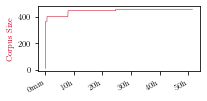

In [95]:
thesis_plot_corpus_size(pesto_path, "2021-10-01-132952-thesis-openssl111-again-0")

# Experiment: thesis-openssl
* OpenSSL: OpenSSL 1.1.1k  25 Mar 2021
* Date: 2021-08-31T14:05:20.148677249+02:00
* Git Ref: b95f0feec66bd267199e805574876b1084a59b39
* Git Commit: Switch from core number to core definition
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Run for thesis


Max value in plotted data: 5736


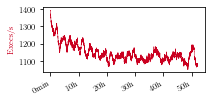

In [96]:
thesis_plot_execs_per_s(pesto_path, "2021-08-31-140520-thesis-openssl-0", specific=10)
#thesis_plot_execs_per_s(pesto_path, "2021-10-03-171441-thesis-openssl101f-0", specific=1)

# Experiment: thesis-openssl
* OpenSSL: OpenSSL 1.1.1k  25 Mar 2021
* Date: 2021-08-31T14:05:20.148677249+02:00
* Git Ref: b95f0feec66bd267199e805574876b1084a59b39
* Git Commit: Switch from core number to core definition
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Run for thesis


Max edges: 35044
Max value in plotted data: 6060


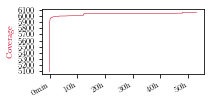

In [97]:
thesis_plot_coverage(pesto_path, "2021-08-31-140520-thesis-openssl-0")

# Experiment: thesis-openssl111-again
* OpenSSL: OpenSSL 1.1.1k  25 Mar 2021
* Date: 2021-10-01T13:29:52.811972451+02:00
* Git Ref: 5a9213bf0d6db615e011b42b3eff3a7c6a92701e
* Git Commit: Add run configs for OpenSSL 102
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Redo intial experiment


Max value in plotted data: 0.020005208
Max value in plotted data: 0.9549688


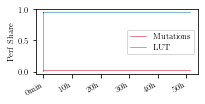

In [98]:
# OpenSSL 111k: Perf Stats
thesis_plot_perf(pesto_path, "2021-10-01-132952-thesis-openssl111-again-0")

# Experiment: thesis-openssl-sanitizer
* OpenSSL: OpenSSL 1.1.1k  25 Mar 2021
* Date: 2021-09-13T11:00:48.373871027+02:00
* Git Ref: b95f0feec66bd267199e805574876b1084a59b39
* Git Commit: Switch from core number to core definition
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

With ASAN


Max value in plotted data: 1668


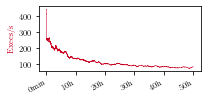

In [99]:
# OpenSSL 111k: With ASAN
thesis_plot_execs_per_s(pesto_path, "2021-09-13-110048-thesis-openssl-sanitizer-0")

# Experiment: thesis-openssl-no-minimzer
* OpenSSL: OpenSSL 1.1.1k  25 Mar 2021
* Date: 2021-09-13T11:11:06.330605492+02:00
* Git Ref: b95f0feec66bd267199e805574876b1084a59b39
* Git Commit: Switch from core number to core definition
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Without minimizer (minimizes only trace length, not term size)


Max value in plotted data: 459


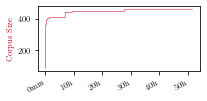

In [100]:
# OpenSSL 111k: No minimizer
thesis_plot_corpus_size(pesto_path, "2021-09-13-111106-thesis-openssl-no-minimzer-0")

## OpenSSL 102u

# Experiment: thesis-openssl102u
* OpenSSL: OpenSSL 1.0.2u  20 Dec 2019
* Date: 2021-10-01T13:23:09.746851989+02:00
* Git Ref: 5a9213bf0d6db615e011b42b3eff3a7c6a92701e
* Git Commit: Add run configs for OpenSSL 102
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Run with openssl102u with seeds: client_attacker12, seed_sucessful12


Max value in plotted data: 399


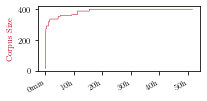

In [101]:
# OpenSSL 102u: Normal execution, Corpus Size
thesis_plot_corpus_size(pesto_path, "2021-10-01-132309-thesis-openssl102u-0")

# Experiment: thesis-openssl102u
* OpenSSL: OpenSSL 1.0.2u  20 Dec 2019
* Date: 2021-10-01T13:23:09.746851989+02:00
* Git Ref: 5a9213bf0d6db615e011b42b3eff3a7c6a92701e
* Git Commit: Add run configs for OpenSSL 102
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Run with openssl102u with seeds: client_attacker12, seed_sucessful12


Max edges: 27644
Max value in plotted data: 4774


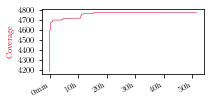

In [102]:
thesis_plot_coverage(pesto_path, "2021-10-01-132309-thesis-openssl102u-0")

## OpenSSL 101f

# Experiment: thesis-openssl101f
* OpenSSL: OpenSSL 1.0.1f 6 Jan 2014
* Date: 2021-10-03T17:14:41.970907640+02:00
* Git Ref: adfd65e9e7a7be67e54f629ccefe6ba7983bfb7e
* Git Commit: Enable smoothing
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Run with openssl101f with seeds: client_attacker12, seed_sucessful12


Max value in plotted data: 498


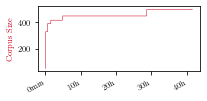

In [103]:
# OpenSSL 101f: Normal execution, Corpus Size
thesis_plot_corpus_size(pesto_path, "2021-10-03-171441-thesis-openssl101f-0")

# Experiment: thesis-openssl101f
* OpenSSL: OpenSSL 1.0.1f 6 Jan 2014
* Date: 2021-10-03T17:14:41.970907640+02:00
* Git Ref: adfd65e9e7a7be67e54f629ccefe6ba7983bfb7e
* Git Commit: Enable smoothing
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Run with openssl101f with seeds: client_attacker12, seed_sucessful12


Max edges: 22568
Max value in plotted data: 4630


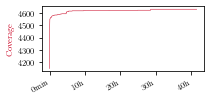

In [104]:
thesis_plot_coverage(pesto_path, "2021-10-03-171441-thesis-openssl101f-0")

## LibreSSL

# Experiment: thesis-libressl
* OpenSSL: LibreSSL 3.3.3
* Date: 2021-08-30T19:50:54.481871812+02:00
* Git Ref: 058262f56bd86893c68fb171662d236a42d7d072
* Git Commit: Update corpus
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Run for thesis with LibreSSL enabled; --no-default-features --features libressl,sancov_libafl,introspection


Max value in plotted data: 476


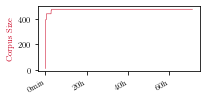

In [105]:
# LibreSSL: Normal execution, corpus size
thesis_plot_corpus_size(pesto_path, "2021-08-30-195054-thesis-libressl-0")

# Experiment: thesis-libressl
* OpenSSL: LibreSSL 3.3.3
* Date: 2021-08-30T19:50:54.481871812+02:00
* Git Ref: 058262f56bd86893c68fb171662d236a42d7d072
* Git Commit: Update corpus
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Run for thesis with LibreSSL enabled; --no-default-features --features libressl,sancov_libafl,introspection


Max edges: 26257
Max value in plotted data: 4654


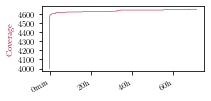

In [106]:
thesis_plot_coverage(pesto_path, "2021-08-30-195054-thesis-libressl-0")

## CVE 2021

# Experiment: 2021-06-28T17:18:22Z-e29788aec4ed9a6237194ecce45017133ae708b0
* OpenSSL: OpenSSL 1.1.1j  16 Feb 2021
* Date: 2021-06-28T17:18:22.325950607+00:00
* Git Ref: e29788aec4ed9a6237194ecce45017133ae708b0
* Git Commit: Fix ref
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

No Description, because this is a quick experiment.


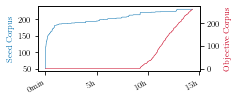

In [107]:
thesis_plot_objectives(pesto_path, "2021-06-28T17:18:22Z-e29788aec4ed9a6237194ecce45017133ae708b0", specific=1)

## Heartbleed

# Experiment: thesis-openssl101f-asan
* OpenSSL: OpenSSL 1.0.1f 6 Jan 2014
* Date: 2021-10-03T17:10:20.591431956+02:00
* Git Ref: adfd65e9e7a7be67e54f629ccefe6ba7983bfb7e
* Git Commit: Enable smoothing
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Run with openssl101f with seeds and asan: client_attacker12, seed_sucessful12


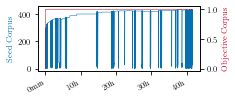

In [108]:
thesis_plot_objectives(pesto_path, "2021-10-03-171020-thesis-openssl101f-asan-0", specific=11, use_fixed=True)

## Executions per Second

In [109]:
def execs_p_sec_average(path, experiment):
    stats, start_date = load(path, experiment, 3)
    times, data = spread_xy(start_date, stats, trunc_minutes=10*60)
    
    print(data[-1]["total_execs"])
    print(data[-1]["total_execs"] / (10*60*60))

execs_p_sec_average(pesto_path, "2021-08-31-140520-thesis-openssl-0")

# Experiment: thesis-openssl
* OpenSSL: OpenSSL 1.1.1k  25 Mar 2021
* Date: 2021-08-31T14:05:20.148677249+02:00
* Git Ref: b95f0feec66bd267199e805574876b1084a59b39
* Git Commit: Switch from core number to core definition
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Run for thesis


19720
19294728
535.9646666666666


In [110]:
execs_p_sec_average(pesto_path, "2021-09-13-110048-thesis-openssl-sanitizer-0")

# Experiment: thesis-openssl-sanitizer
* OpenSSL: OpenSSL 1.1.1k  25 Mar 2021
* Date: 2021-09-13T11:00:48.373871027+02:00
* Git Ref: b95f0feec66bd267199e805574876b1084a59b39
* Git Commit: Switch from core number to core definition
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

With ASAN


5772
2823668
78.43522222222222


## Terms and Trace length

# Experiment: thesis-openssl111-again
* OpenSSL: OpenSSL 1.1.1k  25 Mar 2021
* Date: 2021-10-01T13:29:52.811972451+02:00
* Git Ref: 5a9213bf0d6db615e011b42b3eff3a7c6a92701e
* Git Commit: Add run configs for OpenSSL 102
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Redo intial experiment


Max value in plotted data: 370
Max value in plotted data: 14


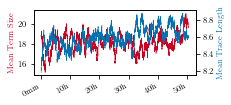

In [111]:
thesis_plot_trace_term(pesto_path, "2021-10-01-132952-thesis-openssl111-again-0")

# Experiment: thesis-openssl111-again
* OpenSSL: OpenSSL 1.1.1k  25 Mar 2021
* Date: 2021-10-01T13:29:52.811972451+02:00
* Git Ref: 5a9213bf0d6db615e011b42b3eff3a7c6a92701e
* Git Commit: Add run configs for OpenSSL 102
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Redo intial experiment


Max value in plotted data: 370


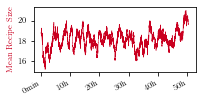

In [112]:
thesis_plot_term(pesto_path, "2021-10-01-132952-thesis-openssl111-again-0")

# Experiment: thesis-openssl111-again
* OpenSSL: OpenSSL 1.1.1k  25 Mar 2021
* Date: 2021-10-01T13:29:52.811972451+02:00
* Git Ref: 5a9213bf0d6db615e011b42b3eff3a7c6a92701e
* Git Commit: Add run configs for OpenSSL 102
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Redo intial experiment


Max value in plotted data: 14


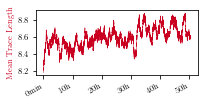

In [113]:
thesis_plot_trace(pesto_path, "2021-10-01-132952-thesis-openssl111-again-0")